## Handwritten Digit Recognition using neural network

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [39]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [40]:
len(x_train),len(x_test)

(60000, 10000)

In [41]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [42]:
x_train.shape

(60000, 28, 28)

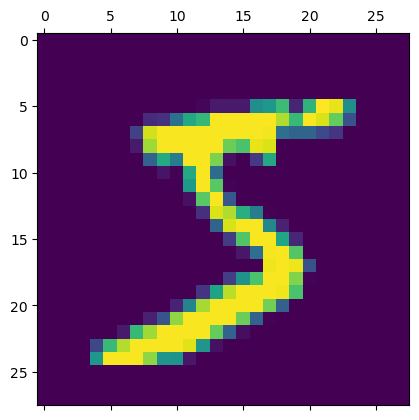

In [43]:
plt.matshow(x_train[0])

## Scale the data b/w 0 to 1

In [44]:
x_test = x_test / 255
x_train = x_train / 255

In [45]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_train_flatten.shape

(60000, 784)

In [46]:
x_test_flatten = x_test.reshape(len(x_test),28*28)
x_test_flatten.shape

(10000, 784)

In [47]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Simple neural network with no hidden layers

In [48]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4704 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3039 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9260


In [49]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2666 - accuracy: 0.9265


[0.2665596902370453, 0.9265000224113464]

In [50]:
y_predicted = model.predict(x_test_flatten)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.9760823e-02, 3.2117308e-07, 7.7765316e-02, 9.4807959e-01,
       1.6907018e-03, 9.4221584e-02, 1.0587950e-06, 9.9983424e-01,
       1.2328115e-01, 6.9589287e-01], dtype=float32)

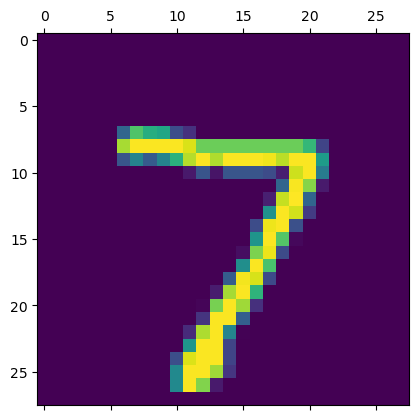

In [51]:
plt.matshow(x_test[0])

In [52]:
np.argmax(y_predicted[0])

7

In [54]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

## confusion matrix

In [55]:
cm = tf.math.confusion_matrix(y_test,y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    0,    4,    5,    3,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   7,    8,  936,   11,    7,    2,   11,   11,   34,    5],
       [   4,    0,   25,  913,    0,   24,    2,   13,   23,    6],
       [   2,    1,    6,    1,  892,    0,   13,    7,   10,   50],
       [  11,    3,    4,   28,    6,  780,   14,    9,   30,    7],
       [  13,    3,    8,    1,    7,   10,  912,    2,    2,    0],
       [   1,    5,   22,    4,    2,    0,    0,  964,    3,   27],
       [   9,    7,    7,   20,    9,   24,    9,   13,  870,    6],
       [  12,    7,    1,    9,   14,    6,    0,   31,    8,  921]])>

<Axes: >

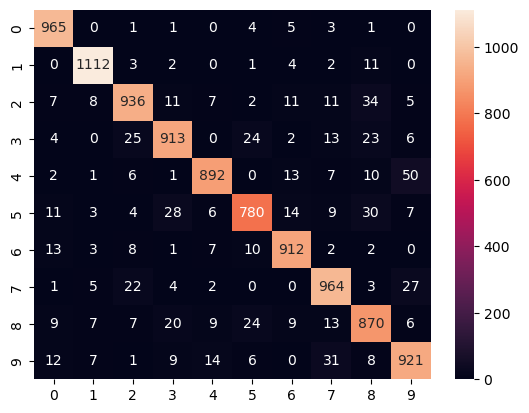

In [57]:
from seaborn import heatmap

plt.xlabel('Predicted')
plt.ylabel('Truth')
heatmap(cm,annot=True,fmt='d')